Vérification des images corrompues...
Chargement des images...
Nombre total d'images : 928
Répartition des classes : [284 239 233 172]


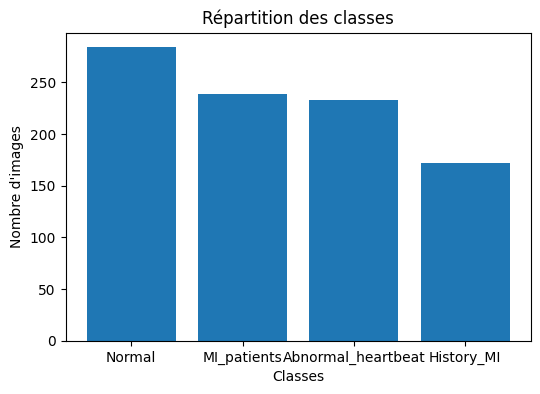

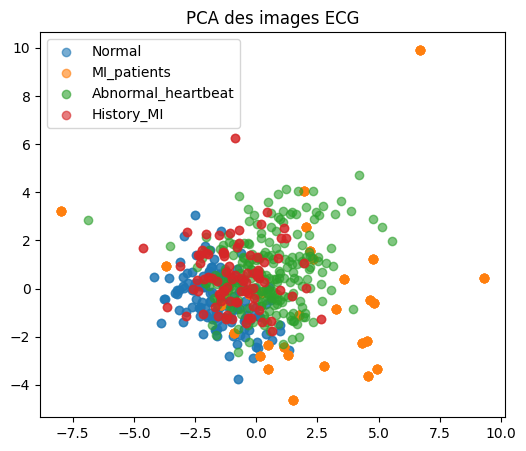

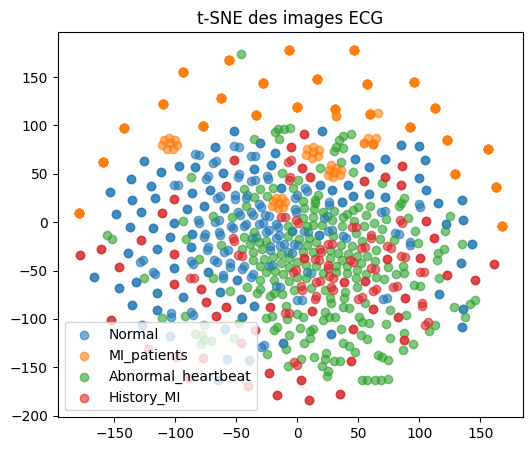

In [1]:
# 01_data_exploration.ipynb

# -------------------------
# Import des librairies
# -------------------------
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# -------------------------
# Configuration
# -------------------------
RAW_DIR = r"C:\Users\USER\Desktop\ecg-classification\data\raw"
PROCESSED_DIR = r"C:\Users\USER\Desktop\ecg-classification\data\processed"

IMAGE_SIZE = 224

categories = ['Normal', 'MI_patients', 'Abnormal_heartbeat', 'History_MI']

# -------------------------
# Vérification des images corrompues
# -------------------------
print("Vérification des images corrompues...")
for category in categories:
    path = os.path.join(RAW_DIR, category)
    for img_name in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, img_name))
        except:
            print(f"Image corrompue détectée : {img_name} dans {category}")

# -------------------------
# Chargement des images
# -------------------------
print("Chargement des images...")
images = []
labels = []

for label, category in enumerate(categories):
    path = os.path.join(RAW_DIR, category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path).convert('L')
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
        images.append(np.array(img)/255.0)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

print(f"Nombre total d'images : {len(images)}")
print(f"Répartition des classes : {np.bincount(labels)}")

# -------------------------
# Histogramme des labels
# -------------------------
plt.figure(figsize=(6,4))
plt.bar(categories, np.bincount(labels))
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.title("Répartition des classes")
plt.show()

# -------------------------
# PCA pour visualisation
# -------------------------
images_flat = images.reshape(len(images), -1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(images_flat)

plt.figure(figsize=(6,5))
for label in np.unique(labels):
    plt.scatter(pca_result[labels==label,0], pca_result[labels==label,1], label=categories[label], alpha=0.6)
plt.legend()
plt.title("PCA des images ECG")
plt.show()

# -------------------------
# t-SNE pour visualisation
# -------------------------
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(images_flat)

plt.figure(figsize=(6,5))
for label in np.unique(labels):
    plt.scatter(tsne_result[labels==label,0], tsne_result[labels==label,1], label=categories[label], alpha=0.6)
plt.legend()
plt.title("t-SNE des images ECG")
plt.show()


In [ ]:
import os
print("Répertoire courant :", os.getcwd())


Répertoire courant : C:\Users\USER\Desktop\ecg-classification\notebooks
